# Plotting for Final Project
## Example: Plotting Randomly Generated Stars in Aitoff projection
======================================

This is an example how to plot data using the astropy.coordinates package in
the Aitoff projection. Here a randomly generated data set will be used. The
final script can be found below.

First we need to import the required packages. We use matplotlib here for
plotting and numpy to get the value of pi.

In [1]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

We now generate random data for visualisation. For RA this is done in the range
of 0 and 360 degrees (``ra_random``), for DEC between -90 and +90 degrees
(``dec_random``).

In [2]:
ra_random = np.random.rand(100)*360.0 #This command uses numpy to generate 100 random coordinates from 0 to 360 degrees
dec_random = np.random.rand(100)*180.0-90.0 #This command does the same from -90 to +90 degress

As next step, those coordinates are transformed into an astropy.coordinates
`~astropy.coordinates.SkyCoord` object.

In [3]:
c = SkyCoord(ra=ra_random*u.degree, dec=dec_random*u.degree, frame='icrs')
#ICRS stands for International Celestial Reference System: https://en.wikipedia.org/wiki/International_Celestial_Reference_System
#The command above is taking our randomly generated coordinates and defining them as RA and DEC in ICRS coordinates

Because matplotlib needs the coordinates in radians, we have to convert them from degrees into radians.

In [4]:
ra_rad = c.ra.radian #this converts the coordinates from degrees to radians
dec_rad = c.dec.radian

Furthermore matplotlib needs the RA coordinate (here, the x coordinate) in the range between -pi and pi, not 0 and 2pi. This means that all values that are larger than pi (180 degrees) are subtrated by 2pi to get the required range.

In [5]:
ra_rad[ra_rad > np.pi] -= 2. * np.pi

As the last step we set up the plotting environment with matplotlib using the Aitoff projection.

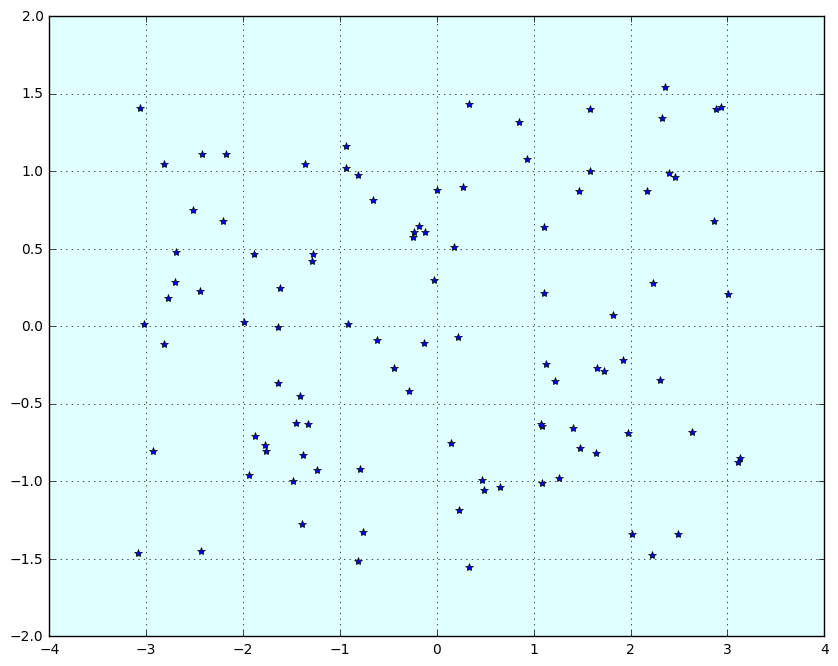

In [6]:
## PLOT CELL
fig = plt.figure(figsize=[10, 8]) #This controls the size of the figure
plt.subplot(111, axisbg='LightCyan')
plt.grid(True)
plt.plot(ra_rad, dec_rad, '*')
plt.show()

Awesome! Now we have our sky plot, but is it the shape that we want it in? We have maps of the earth that usually look like this: <img src="https://i.stack.imgur.com/egiWd.png">

What's different about this map and our own? How do we get from our own rectangular map to the one above? We'll begin by looking at this link: https://en.wikipedia.org/wiki/Map_projection

After we've discussed different types of projections, we can see if python has a built in map projection. (I have a sneaky suspicion that it does!) See if you can find some options on google for projecting a spherical map. As a hint, you might want to start with the astropy library: http://www.astropy.org/astropy-tutorials/ Once you've found a projection method, test it out in the cell below using our data from the cell that begins with a comment saying ##PLOT CELL

Let's divide our project up into steps. 
1. We would like to make a sky map, as seen from earth, of all five clusters used last week, as shown above the equatorial sky. The x-axis tick labels should reflect the hour that these objects reach zenith.
2. The five clusters should have their own individual colors and/or markers, with good reasons for the colors. The map's colors should also be chosen with data visualization in mind.
3. They should be placed on a background of constellations in both northern and southern hemispheres. 
4. The clusters that have known exoplanets should glow. Known exoplanets can be found by researching the clusters. 

Should we do anything for clusters that have sunlike planets?